# Analyze Model Weights

In [1]:
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(
    context="paper", 
    style="whitegrid", 
    font_scale=1.2,
    rc={'figure.figsize': (20, 20), 'figure.dpi': 300}
)

## ICC - Single Result

In [5]:
from common.data import get_model_weights

population = 'adhd'
measure = 'WISC_PSI'
age_group = 'All'

pls_weights = get_model_weights('pls', population, measure, age_group)
ridge_weights = get_model_weights('ridge', population, measure, age_group)

print(pls_weights.shape, ridge_weights.shape)

(34716,) (34716,)


In [9]:
from os.path import join
from common.paths import RIDGE_WEIGHTS

weight_pop = 'adhd'
weight_tar = 'WISC_FSIQ'
weight_age = 'all'
s1_f = f'ridge_{weight_pop}_{weight_tar}_{weight_age}_set_2.npy'
s2_f = f'ridge_healthy_{weight_tar}_{weight_age}_set_1.npy'

s1 = np.load(join(RIDGE_WEIGHTS, s1_f))
s2 = np.load(join(RIDGE_WEIGHTS, s2_f))

In [6]:
%%time
import pingouin as pg

coefs = np.array([pls_weights, ridge_weights])
# coefs = np.array([s1, s2])
# print(f'{population}_{measure}_{age_group}', coefs.shape)

icc_data = pd.DataFrame(coefs).melt(var_name='connection', value_name='weight', ignore_index=False)
icc_data['cv_run_num'] = icc_data.index
icc = pg.intraclass_corr(data=icc_data, targets='connection', raters='cv_run_num', ratings='weight').round(3)
icc.set_index("Type")

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


CPU times: user 31.7 s, sys: 276 ms, total: 32 s
Wall time: 32.2 s


,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.746,6.889,34715,34716,0.0,"[0.74, 0.75]"
ICC2,Single random raters,0.746,6.889,34715,34715,0.0,"[0.74, 0.75]"
ICC3,Single fixed raters,0.746,6.889,34715,34715,0.0,"[0.74, 0.75]"
ICC1k,Average raters absolute,0.855,6.889,34715,34716,0.0,"[0.85, 0.86]"
ICC2k,Average random raters,0.855,6.889,34715,34715,0.0,"[0.85, 0.86]"
ICC3k,Average fixed raters,0.855,6.889,34715,34715,0.0,"[0.85, 0.86]"


## ICC - All Results

In [2]:
%%time
import pingouin as pg
from os.path import join
from common.data import get_model_weights
from common.wisc import WISC_LEVEL
from common.binning import BIN_LABELS
from common.paths import MODEL_RESULTS

results = []
population = 'adhd'

for bin_label in BIN_LABELS:
    for target in WISC_LEVEL[5]:
        pls_weights = get_model_weights('pls', population, target, bin_label)
        ridge_weights = get_model_weights('ridge', population, target, bin_label)
        
        icc_data = pd.DataFrame([pls_weights, ridge_weights]).melt(
            var_name='connection', value_name='weight', ignore_index=False)
        icc_data['cv_run_num'] = icc_data.index
        icc = pg.intraclass_corr(data=icc_data, targets='connection', raters='cv_run_num', ratings='weight').round(3)
        icc1 = icc[icc['Type'] == 'ICC1'].to_dict('records')[0]
        results.append({
            'Population': population,
            'Target': target,
            'Bin': bin_label,
            **icc1,
        })
        print(results[-1])
        
results_df = pd.DataFrame(results)
display(results_df)
filename = f'between-model_icc_{population}.csv'
results_df.to_csv(join(MODEL_RESULTS, filename))

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


{'Population': 'adhd', 'Target': 'WISC_FSIQ', 'Bin': 'All', 'Type': 'ICC1', 'Description': 'Single raters absolute', 'ICC': 0.959, 'F': 47.922, 'df1': 34715, 'df2': 34716, 'pval': 0.0, 'CI95%': array([0.96, 0.96])}
{'Population': 'adhd', 'Target': 'WISC_VSI', 'Bin': 'All', 'Type': 'ICC1', 'Description': 'Single raters absolute', 'ICC': 0.961, 'F': 49.906, 'df1': 34715, 'df2': 34716, 'pval': 0.0, 'CI95%': array([0.96, 0.96])}
{'Population': 'adhd', 'Target': 'WISC_VCI', 'Bin': 'All', 'Type': 'ICC1', 'Description': 'Single raters absolute', 'ICC': 0.96, 'F': 48.804, 'df1': 34715, 'df2': 34716, 'pval': 0.0, 'CI95%': array([0.96, 0.96])}
{'Population': 'adhd', 'Target': 'WISC_FRI', 'Bin': 'All', 'Type': 'ICC1', 'Description': 'Single raters absolute', 'ICC': 0.959, 'F': 47.329, 'df1': 34715, 'df2': 34716, 'pval': 0.0, 'CI95%': array([0.96, 0.96])}
{'Population': 'adhd', 'Target': 'WISC_WMI', 'Bin': 'All', 'Type': 'ICC1', 'Description': 'Single raters absolute', 'ICC': 0.948, 'F': 37.679, '

,Population,Target,Bin,Type,Description,ICC,F,df1,df2,pval,CI95%
0,adhd,WISC_FSIQ,All,ICC1,Single raters absolute,0.959,47.922,34715,34716,0.0,"[0.96, 0.96]"
1,adhd,WISC_VSI,All,ICC1,Single raters absolute,0.961,49.906,34715,34716,0.0,"[0.96, 0.96]"
2,adhd,WISC_VCI,All,ICC1,Single raters absolute,0.960,48.804,34715,34716,0.0,"[0.96, 0.96]"
3,adhd,WISC_FRI,All,ICC1,Single raters absolute,0.959,47.329,34715,34716,0.0,"[0.96, 0.96]"
4,adhd,WISC_WMI,All,ICC1,Single raters absolute,0.948,37.679,34715,34716,0.0,"[0.95, 0.95]"
5,adhd,WISC_PSI,All,ICC1,Single raters absolute,0.955,43.305,34715,34716,0.0,"[0.95, 0.96]"
6,adhd,WISC_FSIQ,Bin 1,ICC1,Single raters absolute,0.973,74.319,34715,34716,0.0,"[0.97, 0.97]"
7,adhd,WISC_VSI,Bin 1,ICC1,Single raters absolute,0.948,37.758,34715,34716,0.0,"[0.95, 0.95]"
8,adhd,WISC_VCI,Bin 1,ICC1,Single raters absolute,0.968,61.716,34715,34716,0.0,"[0.97, 0.97]"
9,adhd,WISC_FRI,Bin 1,ICC1,Single raters absolute,0.986,137.652,34715,34716,0.0,"[0.99, 0.99]"


CPU times: user 11min 56s, sys: 3.92 s, total: 12min
Wall time: 11min 59s


## Plot Weights

In [2]:
from operator import itemgetter

from common.data import get_model_weights
from common.paths import POWER
from common.plotting import plot_connections
from common.power_atlas import POWER_LABELS, to_power_fc_matrix, get_power_mpl_legend
from mne.viz import circular_layout, plot_connectivity_circle

In [3]:
population = 'adhd'
measure = 'WISC_FSIQ'
age_group = 'All'

pls_weights = get_model_weights('pls', population, measure, age_group)
ridge_weights = get_model_weights('ridge', population, measure, age_group)

print(pls_weights.shape, ridge_weights.shape)

(34716,) (34716,)


In [4]:
selected_features = ridge_weights
print(np.min(selected_features), np.max(selected_features))

-0.02840773 0.025777569


### Glass brain

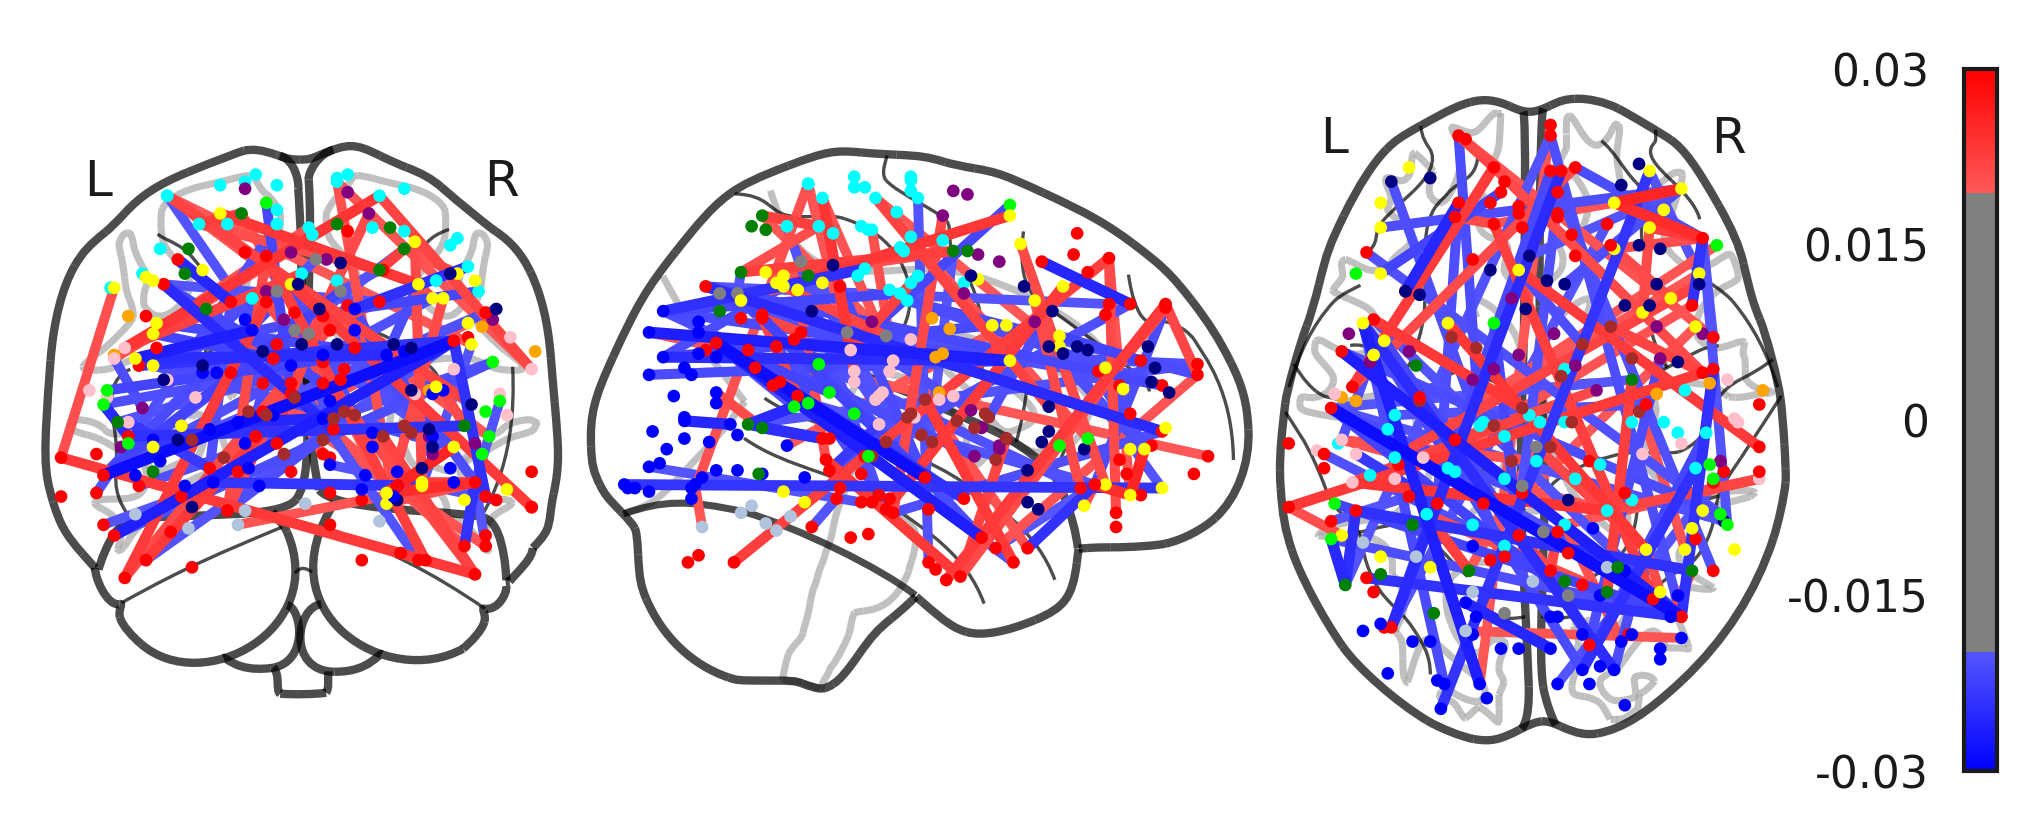

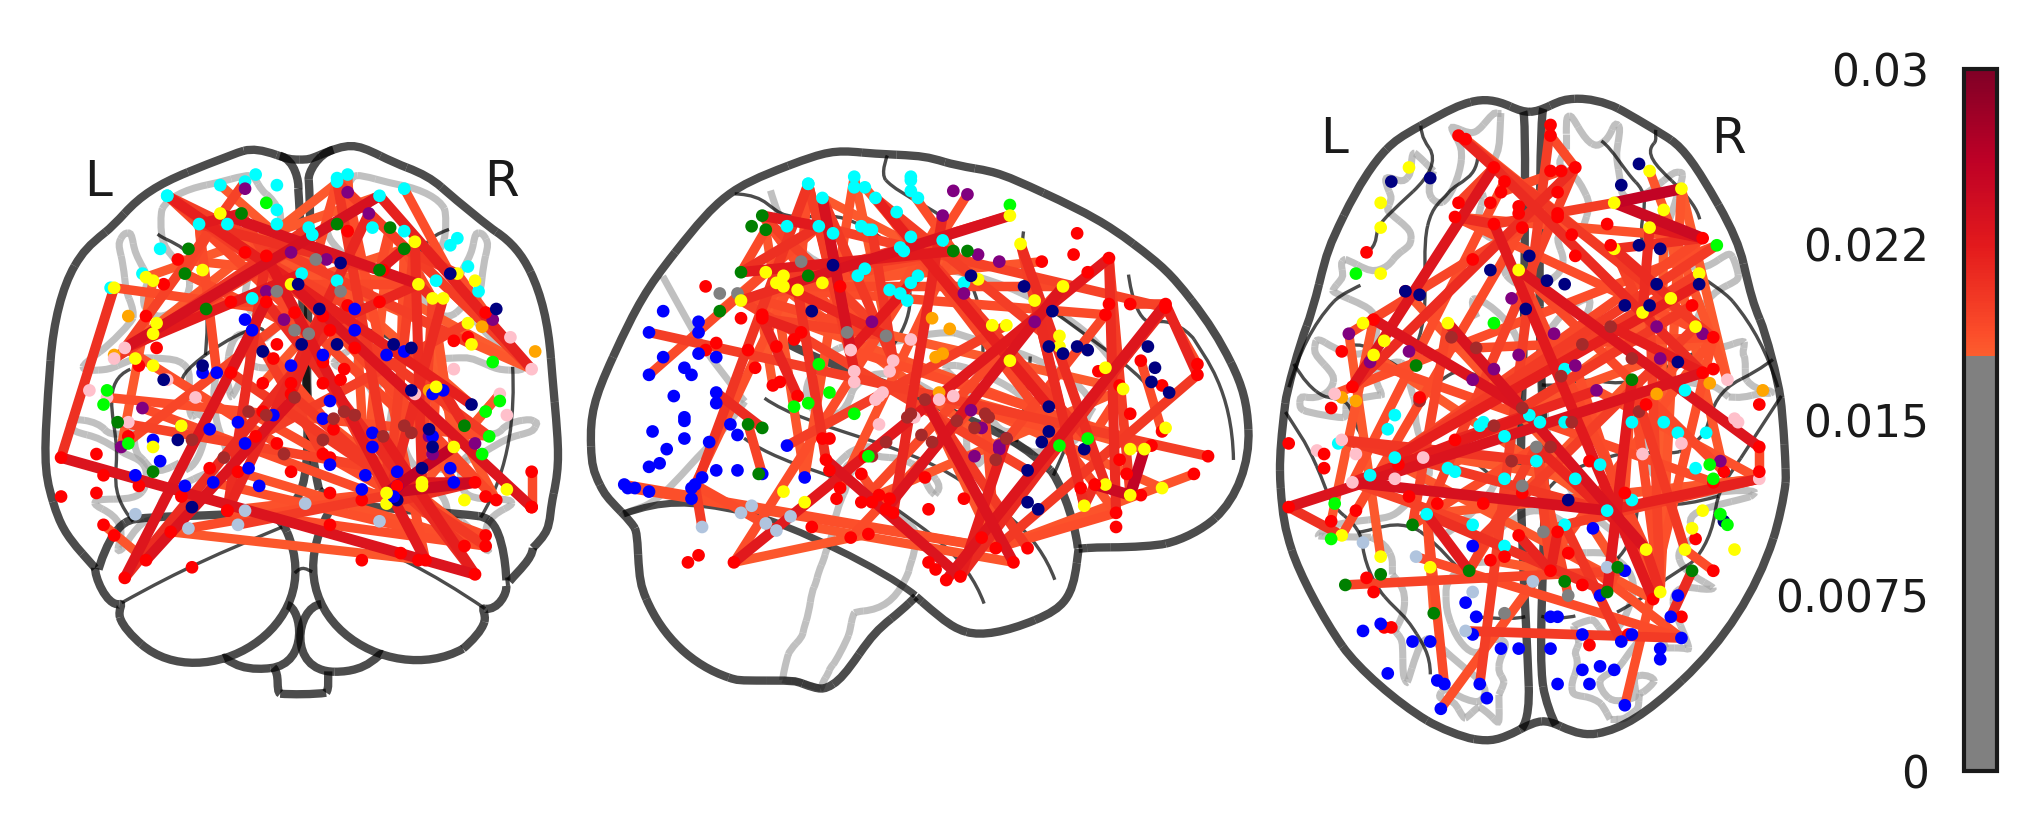

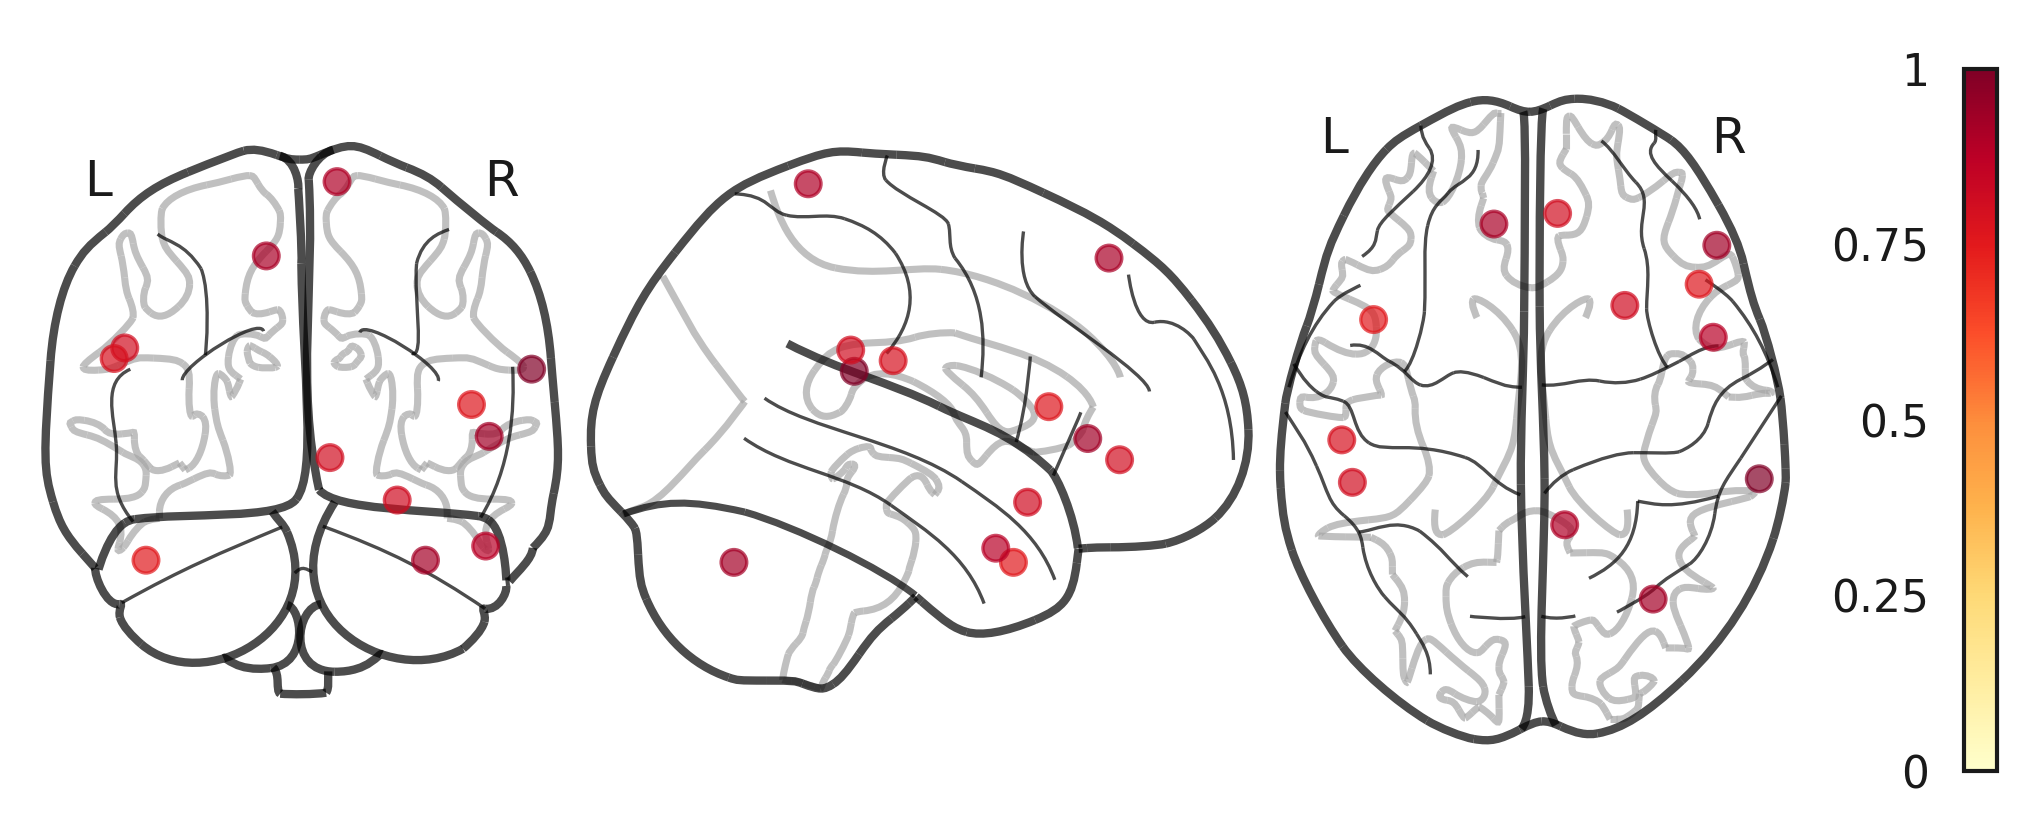

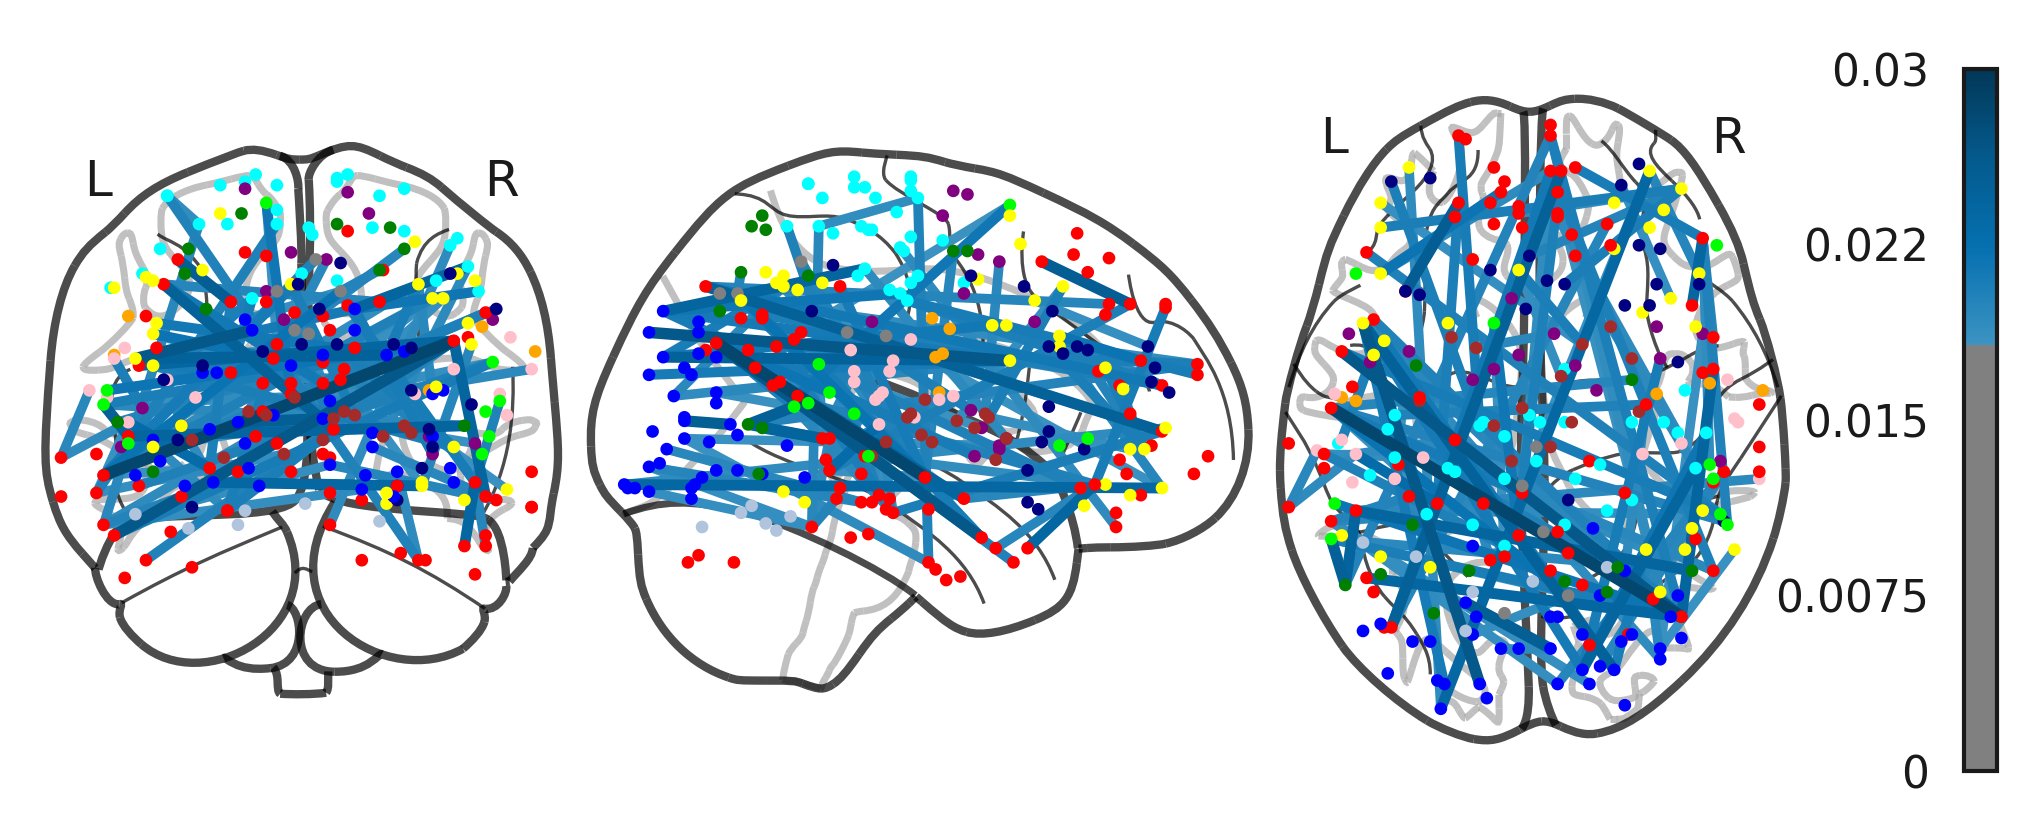

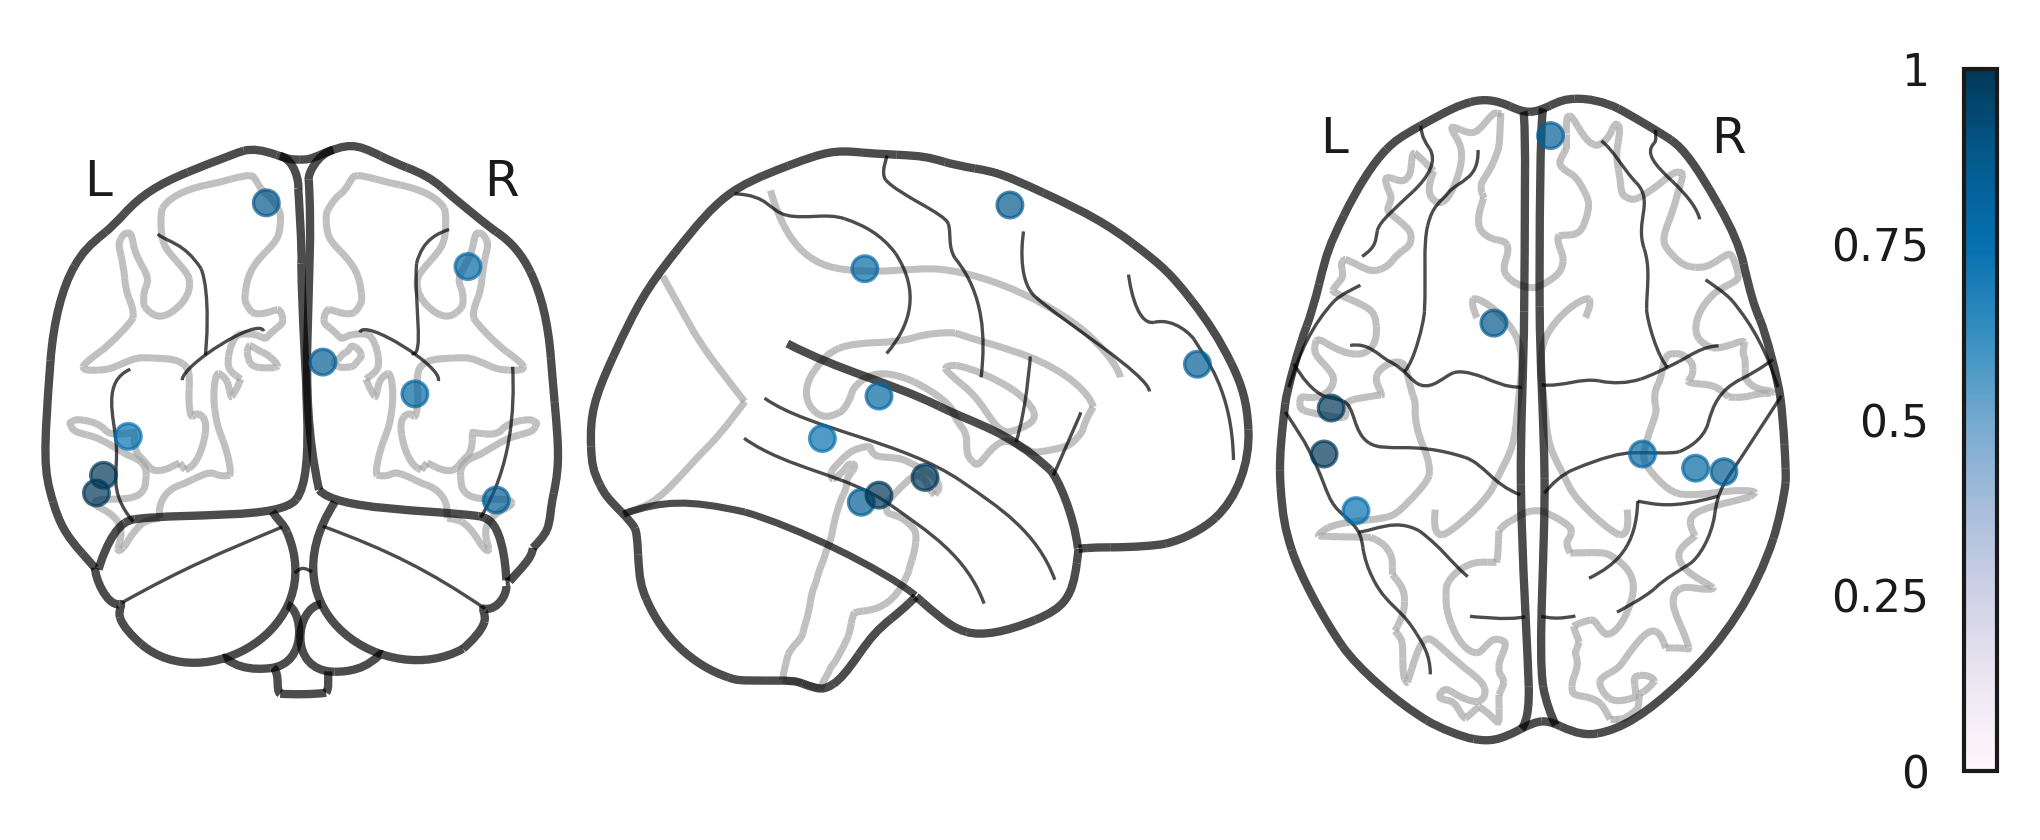

In [14]:
plot_connections(selected_features, -0.03, 0.03, '99.7%', False, True, False)

### Connectivity circle

In [8]:
node_names = [str(node_num) for node_num in range(1, 265)]
node_labels = list(zip(node_names, POWER_LABELS['Assignment']))
node_labels.sort(key=itemgetter(1))
node_order = [node[0] for node in node_labels]

num_nodes_per_system = POWER_LABELS['System'].value_counts().sort_index()
group_boundaries = np.array(np.cumsum(num_nodes_per_system.values)[:-1])

node_colors = POWER_LABELS['Color'].values.tolist()

node_angles = circular_layout(node_names, node_order, group_boundaries=group_boundaries,
                              group_sep=0)

In [ ]:
power_legend_patches = get_power_mpl_legend()
matrix = to_power_fc_matrix(selected_features)

plt.rc('legend',fontsize=7)
figx = plt.figure(figsize=(10, 10), facecolor=(0, 0, 0, 0))
figx.legend(handles=power_legend_patches, loc="center right")
node_names = ["" for node_num in range(1, 265)]
fig, ax = plot_connectivity_circle(matrix, node_names, n_lines=200, node_angles=node_angles, 
                         fontsize_names=4, padding=0, colormap='bwr', linewidth=1, show=True,
                         node_colors=node_colors, facecolor=(0, 0, 0, 0), node_edgecolor=(0, 0, 0, 0),
                         colorbar=True, node_width=0.9, fig=figx)